In [ ]:
#Description: this program uses an rnn called lstm
#             to pridict the closing the stock price of a corporation. using the past 60day stock price


In [ ]:
#import the library
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#get the stock quote
df= web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-12-17')
print(df.head())
#print(df)

RemoteDataError: ignored

In [ ]:
pip install --upgrade pandas DataReader

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
#get the number of rows and columns in the dataset
df.shape

(2508, 6)

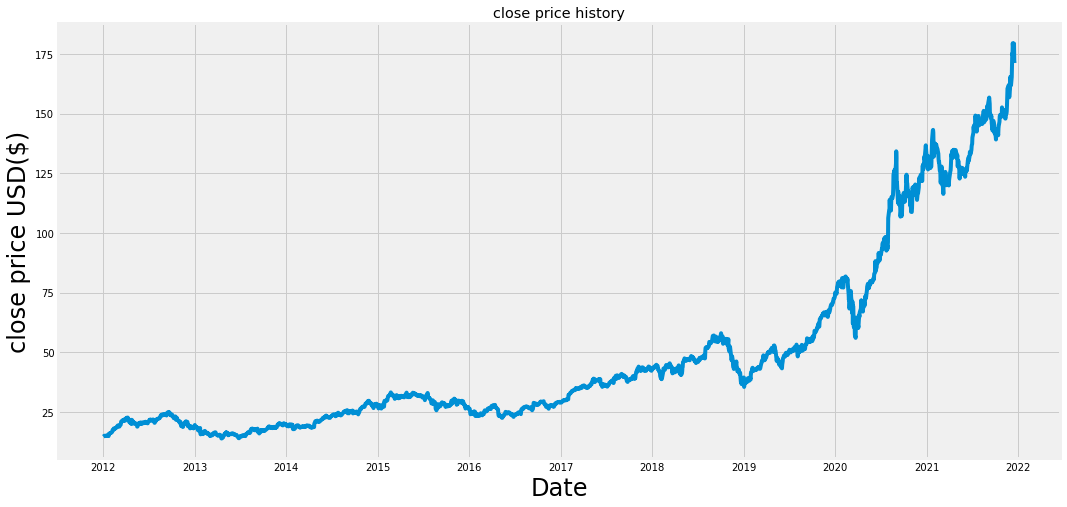

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=24)
plt.ylabel('close price USD($)',fontsize=24)
plt.show()

In [ ]:
#create a new dataframe with only close column
data=df.filter(['Close'])
#convert the dataframe to a numpy array
dataset=data.values
#get the number of rows to train the model on
train_data_len=math.ceil(len(dataset)*.8)
print(train_data_len)
dataset

2007


array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [179.30000305],
       [172.25999451],
       [171.13999939]])

In [ ]:
#scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00446691],
       [0.00494381],
       [0.00593431],
       ...,
       [0.99909371],
       [0.95655653],
       [0.94978929]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:train_data_len, :]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()  

[array([0.00446691, 0.00494381, 0.00593431, 0.00687732, 0.00673274,
       0.00705859, 0.00690969, 0.00665937, 0.00631841, 0.00737365,
       0.0083253 , 0.00803182, 0.00642415, 0.00795844, 0.00644789,
       0.01211246, 0.01167441, 0.01224626, 0.01348275, 0.01423154,
       0.01416897, 0.01393807, 0.01492209, 0.01584783, 0.0168966 ,
       0.01859057, 0.022149  , 0.02220294, 0.02418393, 0.02566426,
       0.02312007, 0.02409976, 0.02408035, 0.02682739, 0.0264368 ,
       0.0271597 , 0.02845878, 0.02918169, 0.0312641 , 0.03278111,
       0.03321917, 0.03337239, 0.03077856, 0.03015276, 0.03024555,
       0.03268402, 0.03337024, 0.03484411, 0.03831837, 0.0429536 ,
       0.04208611, 0.04208827, 0.04543954, 0.0464883 , 0.04574164,
       0.04505975, 0.04434979, 0.0467084 , 0.04832685, 0.04900444])]
[0.04732988300131198]

[array([0.00446691, 0.00494381, 0.00593431, 0.00687732, 0.00673274,
       0.00705859, 0.00690969, 0.00665937, 0.00631841, 0.00737365,
       0.0083253 , 0.00803182, 0.00

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1947, 60, 1)

In [ ]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train thee model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1947/1947 [==============================] - 54s 26ms/step - loss: 2.1030e-04


In [ ]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[train_data_len-60:,:]
#create the datasets x_test and y_test
x_test=[]
y_test=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#converting the data into a numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape


(501, 60, 1)

In [ ]:
#get the models predicted price_values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


NameError: ignored

In [ ]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.118596874549241

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


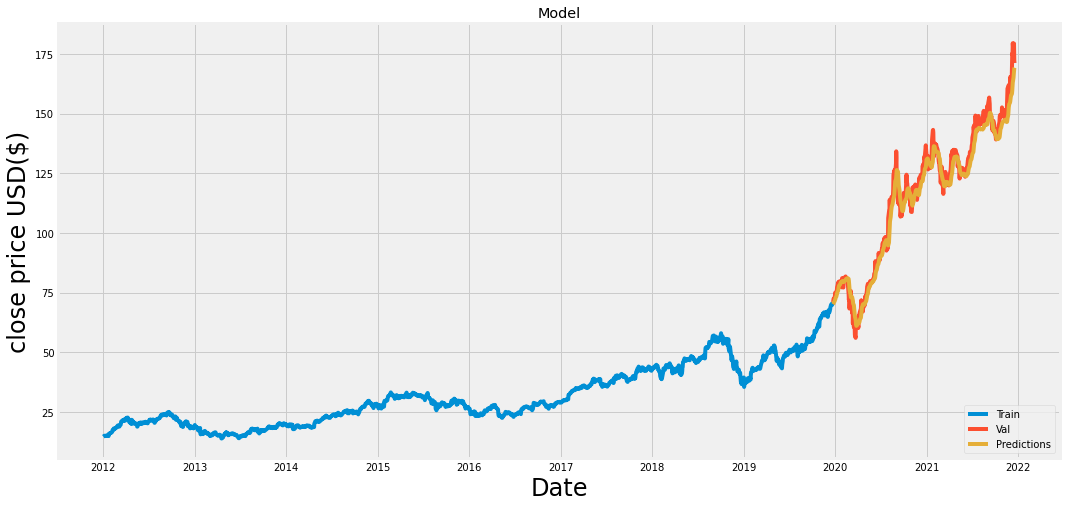

In [ ]:
#plot the data
train=data[:train_data_len]
valid=data[train_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=24)
plt.ylabel('close price USD($)',fontsize=24)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-12-24,71.067497,70.189430
2019-12-26,72.477501,70.512672
2019-12-27,72.449997,70.939171
2019-12-30,72.879997,71.376732
2019-12-31,73.412498,71.820282
...,...,...
2021-12-13,175.740005,165.008743
2021-12-14,174.330002,166.620865
2021-12-15,179.300003,167.690414


In [ ]:
#get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-12-17')
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
x_test=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[168.9784]]


In [ ]:
#get the quote
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2021-12-20',end='2021-12-20')
print(apple_quote2['Close'])

Date
2021-12-20    169.75
Name: Close, dtype: float64
